# Tensorflow初探

## 1 基础知识


In [1]:
import tensorflow as tf
hello = tf.constant('hello,Tensorflow')
sess = tf.Session()
print(sess.run(hello))

b'hello,Tensorflow'


In [2]:
# 加法运算
a = tf.constant(10)
b = tf.constant(22)
print(sess.run(a+b))

32


## 2 设计理念

* 将图的定义和图的运行完全分开
* Tensorflow中设计的运算都要放在图中，而图的运行只发生在会话(session)中。开启会话后，就可以用数据去填充节点，进行计算；关闭会话后，就不能进行计算了。

In [3]:
# 创建图
a = tf.constant([1.0,2.0])
b = tf.constant([3.0,4.0])
c = a*b

#创建会话
sess = tf.Session()

#计算c
print(sess.run(c))   #进行矩阵乘法，输出[3.,8.]
sess.close()

[3. 8.]


## 3 开始学习

**首先要加载相应的模块tensorflow,由于初级入门可以采用numpy来创建我们的数据,以最简单的线性函数为例**

In [4]:
import tensorflow as tf
import numpy as np

# 产生数据
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1+0.3

In [6]:
with tf.Session() as sess:
    print(sess.run(tf.random_uniform((4,4),minval = -0.5, maxval = 0.5,dtype=tf.float32)))

[[-0.3762325  -0.06038916 -0.4716283  -0.17205572]
 [ 0.2493447   0.2547897  -0.32604206 -0.09599078]
 [ 0.31728172 -0.45111716  0.4342649   0.23180938]
 [-0.27708495 -0.2950797   0.2579682   0.11972451]]


In [13]:
with tf.Session() as sess:
    print(sess.run(tf.random_uniform([1],-1.0,1.0)))

[-0.13584924]


In [17]:
with tf.Session() as sess:
    print(sess.run(tf.zeros([1])))

[0.]


**搭建模型**
* 采用tf.Variable来创建参数

In [18]:
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data+biases

**计算预测值和实际值之间的误差**

In [20]:
loss = tf.reduce_mean(tf.square(y-y_data))

**优化--反向传播**
* 反向传播交给optimizer,使用的误差传递方法是梯度下降法：Gradient Descent，然后使用optimizer来进行参数更新

In [21]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

**训练数据**
* 使用定义好的结构之前一定要初始化之前定义的Variable

In [22]:
init = tf.global_variables_initializer()

**创建对话Sesson()并运行**

In [23]:
sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step%20 == 0:
        print(step,sess.run(Weights),sess.run(biases))

0 [-0.41850513] [0.87923956]
20 [-0.07366326] [0.39947176]
40 [0.05289396] [0.32698166]
60 [0.08722252] [0.30731878]
80 [0.09653412] [0.3019852]
100 [0.09905992] [0.30053848]
120 [0.09974501] [0.30014607]
140 [0.09993082] [0.30003965]
160 [0.09998123] [0.30001077]
180 [0.09999493] [0.30000293]
200 [0.09999863] [0.3000008]


**通过上面的例子我们简单演示了如何机器去学习拟合简单的一个线性函数，主要关键点：**
* 变量初始化
* 建立对话Session()进行运行
* 理解符号式编程的思想

## 4 进一步讲解，细化

**Session会话控制**

Session是Tensorflow为了控制和输出文件的执行的语句，运行session.run()可以获取要得知的运算计算，或者你想要运算的部分。
接下来以两个矩阵相乘为例：

In [25]:
#新建两个矩阵
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])

product = tf.matmul(matrix1,matrix2)

**上述只是产生了运算，我们需要使用Session来激活product并得到计算结果**

In [26]:
# method1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[12]]


In [27]:
# method2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


**Variable变量**
* 在Tensorflow中，定义了某字符串是变量，它才是变量

In [28]:
state = tf.Variable(0,name='counter')

# 定义常量one
one = tf.constant(1)

#定义加法步骤（注：此步并没有直接计算）
new_value = tf.add(state,one)

#将State更新成new_value
update = tf.assign(state,new_value)

**再次强调，定义可变量，那么初始化变量是非常重要的**

In [29]:
init_one = tf.global_variables_initializer()

#使用Session
with tf.Session() as sess:
    sess.run(init_one)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


**Placeholder传入值**
* placeholder是Tensorflow的占位符，暂时存储变量
* Tensorflow如果想要从外部传入data，就需要用到tf.placeholder(),然后以sess.run(***,feed_back={input:**}}这种形式传递数据

In [30]:
# 在Tensorflow中需要定义placeholder的type，一般为float32形式
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

#mul = multiply将input1和input2做乘法运算，并输出为output
output = tf.multiply(input1,input2)

接下来传值交给sess.run()，需要传入的值放在了feed_dict={}

In [31]:
with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[4.]}))

[28.]


**激活函数（Activation function）**

* Sigmoid函数
$$
S(x)=\frac{1}{1+e^{-x}}
$$

In [32]:
import numpy as np
def sigmoid_func(x):
    return 1/(1+np.exp(-x))

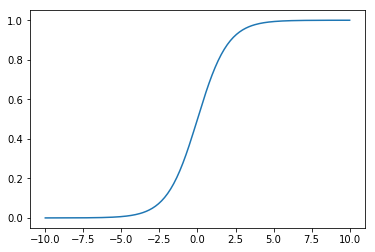

In [34]:
import matplotlib.pylab as plt

x = np.linspace(-10,10,200)
y = sigmoid_func(x)
plt.plot(x,y)
plt.show()

* tanh函数
$$
tanh(x) = \frac{sinh x}{cosh x} = \frac{e^{x}-e{-x}}{e^{x}+e{-x}}=\frac{1-e^{-2x}}{1+e^{-2x}}
$$

In [35]:
def tanh_func(x):
    return (1-np.exp(-2*x))/(1+np.exp(-2*x))

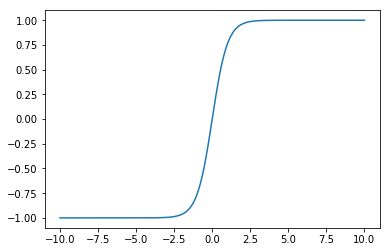

In [36]:
import matplotlib.pylab as plt

x = np.linspace(-10,10,200)
y = tanh_func(x)
plt.plot(x,y)
plt.show()

* relu函数
$$
f(x) = max(x,0)
$$

In [40]:
def relu_func(x):
    return np.maximum(x,0)
    

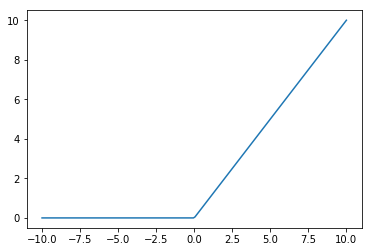

In [41]:
import matplotlib.pylab as plt

x = np.linspace(-10,10,200)
y =relu_func(x)
plt.plot(x,y)
plt.show()

* softplus函数
$$
f(x) = log(1+e^{x})
$$

In [42]:
def softplus_func(x):
    return np.log(1+np.exp(x))

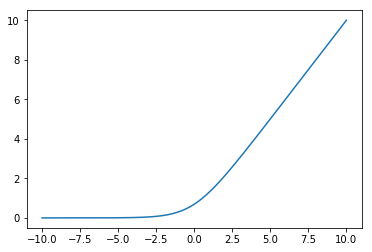

In [43]:
import matplotlib.pylab as plt

x = np.linspace(-10,10,200)
y =softplus_func(x)
plt.plot(x,y)
plt.show()

* leakrelu函数
$$
f(x) = max(x,leak*x)
$$

In [45]:
def leakrelu_func(x):
    return np.maximum(x,0.2*x)
    

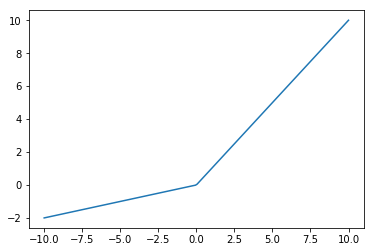

In [46]:
import matplotlib.pylab as plt

x = np.linspace(-10,10,200)
y =leakrelu_func(x)
plt.plot(x,y)
plt.show()

**对于激活函数的解释及其应用会结合后面的神经网络构建进行讲解